In [64]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torchvision import transforms
from scipy.spatial.distance import euclidean

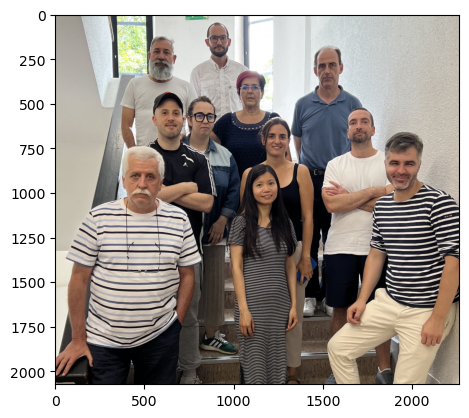

In [26]:
# open method used to open different extension image file
im = Image.open("./IMG_0862_new.jpg")
# This method will show image in any image viewer 
plt.imshow(im);

In [33]:
caras_detectadas.shape

(11, 4)

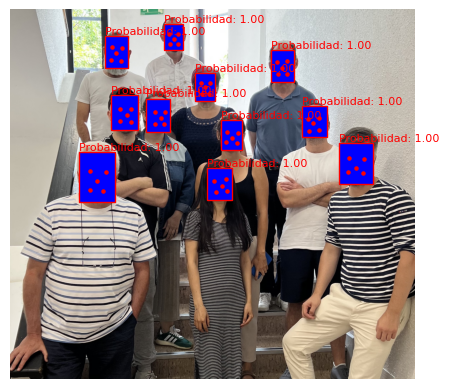

In [54]:
def mtcnn_face_detector(img):
    mtcnn = MTCNN(keep_all=True)  # Utilizamos keep_all=True para obtener todas las caras detectadas
    img = Image.open(img)
    boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)

    return img, boxes, probs, landmarks

def extract_faces(image_path):
    mtcnn = MTCNN(keep_all=True)  # Utilizamos keep_all=True para obtener todas las caras detectadas
    img = Image.open(image_path)
    face_tensors = mtcnn(img)  # Usamos la función mtcnn directamente para obtener las caras extraídas

    return face_tensors

def get_embeddings(face_tensors):
    # Cargar el modelo InceptionResnetV1 preentrenado con "vggface2"
    resnet = InceptionResnetV1(pretrained = "vggface2").eval()
    
    # Preprocesar los tensores de las caras para adptarlos al modelo
    preprocessed_faces = torch.stack([transforms.Resize((160, 160))(face) for face in face_tensors])
    
    # Obtener los embeddings utilizando el modelo InceptionResenetV1
    with torch.no_grad():
        embeddingds = resnet(preprocessed_faces)
        
    return embeddingds


ruta_img = os.path.join("C:/Users/72478072N/Documents/MF1", "./IMG_0862_new.jpg")

img_grupo, caras_detectadas, probabilidades, landmarks = mtcnn_face_detector(ruta_img)

plt.imshow(img_grupo)
plt.axis("off")

if caras_detectadas is not None:
    for box, prob, landmark in zip(caras_detectadas, probabilidades, landmarks):
        x, y, w, h = box
        rect = plt.Rectangle((x, y), w - x, h - y, linewidth=1, edgecolor='r', facecolor='b')
        plt.gca().add_patch(rect)

        # Mostrar la probabilidad de que la bounding box contenga una cara
        plt.text(x, y - 10, f"Probabilidad: {prob:.2f}", color='red', fontsize=8)

        # Mostrar las coordenadas de los ojos, nariz y comisura de la boca en cada cara detectada
        for (x, y) in landmark:
            plt.scatter(x, y, s=5, c='red')



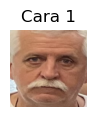

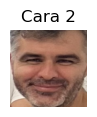

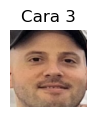

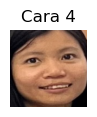

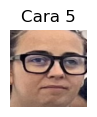

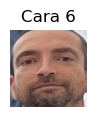

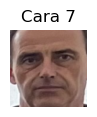

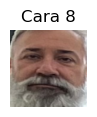

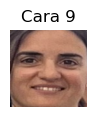

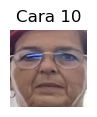

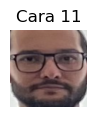

In [38]:
# Tarea 6: Extracción de caras utilizando el método forward() y mostrarlas en pantalla
face_tensors = extract_faces(ruta_img)

for i, face_tensor in enumerate(face_tensors):
    plt.figure(figsize = (1, 1))
    face_img = face_tensor.permute(1, 2, 0).numpy()
    face_img = (face_img - face_img.min()) / (face_img.max() - face_img.min())
    plt.imshow(face_img)  
    plt.axis('off')
    plt.title(f"Cara {i+1}")
    
for i in range(Numpy.ipynb)
    
plt.show()

Distancia entre cara 1 y cara 2: 1.1801
Distancia entre cara 1 y cara 3: 1.3366
Distancia entre cara 2 y cara 3: 1.5122
Encodings de las caras:
tensor([[ 1.2209e-02,  2.4464e-02,  1.9858e-03,  6.0858e-02, -3.1520e-02,
          2.0316e-02, -7.5789e-02,  2.8722e-02, -6.2701e-03,  5.5390e-02,
          4.6224e-02,  1.4666e-02,  3.4831e-02, -4.1205e-02, -3.9899e-03,
         -3.5726e-02, -7.9396e-02, -4.0273e-02,  1.6743e-02,  9.7582e-03,
         -2.4526e-02, -1.5870e-02, -6.7942e-02, -1.6154e-02,  2.5852e-03,
          2.7982e-02, -1.7874e-02,  2.5922e-02, -3.7368e-02,  1.7631e-03,
         -3.7941e-02, -1.3012e-02, -6.0064e-02,  9.4464e-03, -8.2295e-02,
         -9.2205e-03,  5.0030e-02, -2.0246e-02,  6.0351e-03,  5.0326e-03,
         -2.0704e-02,  1.3286e-01,  3.6439e-02,  3.4260e-02,  4.7032e-02,
          7.1929e-02,  1.7833e-02, -1.8966e-02,  1.2092e-02, -6.0792e-02,
          2.0034e-02, -5.4450e-02, -1.3737e-02,  2.7666e-02,  2.5928e-03,
          2.0344e-02,  7.0561e-03, -3.5242

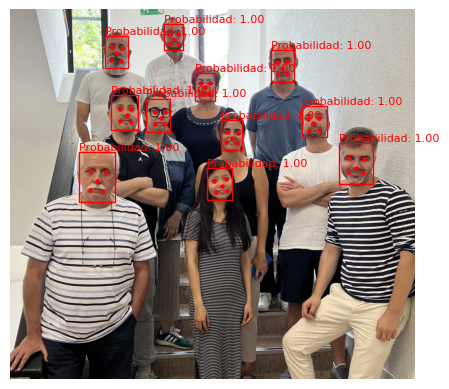

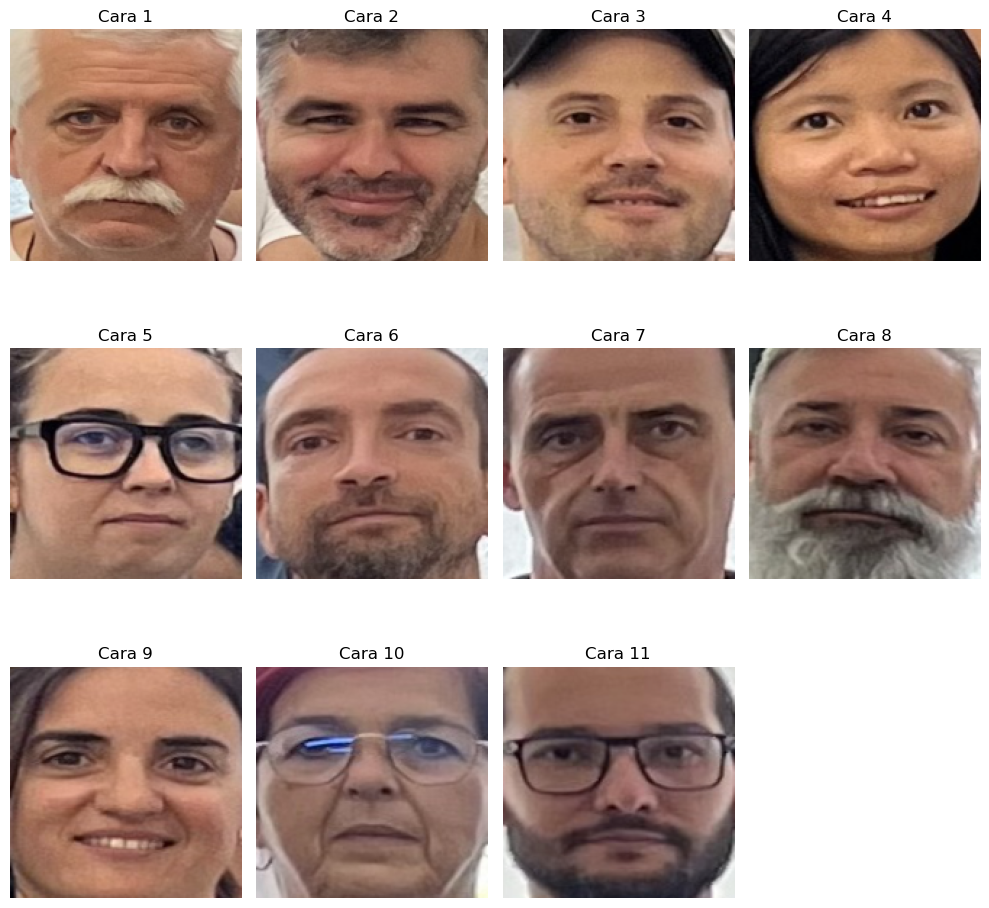

In [77]:
###############
# SECURE CODE #
###############

def mtcnn_face_detector(img):
    mtcnn = MTCNN(
        keep_all=True, # Utilizamos keep_all=True para obtener todas las caras detectadas
        min_face_size = 20,
        # threshold     = [0.6, 0.7, 0.7],
        post_process  = False,
        image_size    = 160,
        # device        = device
    )  
    img = Image.open(img)
    boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)

    return img, boxes, probs, landmarks

def extract_faces(image_path):
    mtcnn = MTCNN(keep_all=True)  # Utilizamos keep_all=True para obtener todas las caras detectadas
    img = Image.open(image_path)
    face_tensors = mtcnn(img)  # Usamos la función mtcnn directamente para obtener las caras extraídas

    return face_tensors

def get_embeddings(face_tensors):
    # Cargar el modelo InceptionResnetV1 preentrenado con 'vggface2'
    resnet = InceptionResnetV1(pretrained='vggface2').eval()

    # Preprocesar los tensores de las caras para adaptarlos al modelo
    preprocessed_faces = torch.stack([transforms.Resize((160, 160))(face) for face in face_tensors])

    # Obtener los embeddings utilizando el modelo InceptionResnetV1
    with torch.no_grad():
        embeddings = resnet(preprocessed_faces)

    return embeddings

ruta_img = os.path.join("C:/Users/72478072N/Documents/MF1", "./IMG_0862_new.jpg")

img_grupo, caras_detectadas, probabilidades, landmarks = mtcnn_face_detector(ruta_img)

plt.imshow(img_grupo)
plt.axis("off")

if caras_detectadas is not None:
    for box, probs, landmark in zip(caras_detectadas, probabilidades, landmarks):
        x, y, w, h = box
        rect = plt.Rectangle((x, y), w - x, h - y, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        
        # Mostrar la probabilidad de que la bounding box contenga una cara
        plt.text(x, y - 10, f"Probabilidad: {prob:.2f}", color='red', fontsize=8)

        # Mostrar las coordenadas de los ojos, nariz y comisura de la boca en cada cara detectada
        for (x, y) in landmark:
            plt.scatter(x, y, s=5, c='red')

# Tarea 6: Extracción de caras utilizando el método forward() y mostrarlas en pantalla
face_tensors = extract_faces(ruta_img)

# Calcular el número de filas y columnas para la cuadrícula de subfiguras
num_faces = len(face_tensors)
rows = int(num_faces ** 0.5)
cols = (num_faces + rows - 1) // rows

# Crear la cuadrícula de subfiguras y mostrar las caras extraídas
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < num_faces:
        face_tensor = face_tensors[i]
        face_img = face_tensor.permute(1, 2, 0).numpy()  # Convertir el tensor a una imagen numpy
        face_img = (face_img - face_img.min()) / (face_img.max() - face_img.min())  # Escalar los valores de los píxeles al rango [0, 1]
        ax.imshow(face_img)
        ax.axis('off')
        ax.set_title(f"Cara {i+1}")

# Eliminar subfiguras vacías si hay menos caras que subfiguras
for i in range(num_faces, rows * cols):
    fig.delaxes(axes.flatten()[i])

# Tarea 8: Obtener los encodings de todas las caras de la imagen
embeddings = get_embeddings(face_tensors)

# Calcular las distancias entre embeddigns de tres caras de tres personas de clase
if num_faces >= 3:
    # Indices de las caras seleccionadas (por ejemplo, las primeras tres)
    idx_1, idx_2, idx_3 = 0, 1, 2
    
    embedding_1, embedding_2, embedding_3 = embeddings[idx_1], embeddings[idx_2], embeddigns[idx_3]

    # Calcular las distancias euclidianas entre los embeddings selccionados
    distance_1_2 = euclidean(embedding_1.numpy(), embedding_2.numpy())
    distance_1_3 = euclidean(embedding_1.numpy(), embedding_3.numpy())
    distance_2_3 = euclidean(embedding_2.numpy(), embedding_3.numpy())
    
    print(f"Distancia entre cara 1 y cara 2: {distance_1_2:.4f}")
    print(f"Distancia entre cara 1 y cara 3: {distance_1_3:.4f}")
    print(f"Distancia entre cara 2 y cara 3: {distance_2_3:.4f}")
    

# Imprimir todos los embeddings
torch.set_printoptions(threshold=10000)
print("Encodings de las caras:")
print(embeddings)

plt.tight_layout()
plt.show()

Distancia entre cara 1 y cara 2: 1.1801
Distancia entre cara 1 y cara 3: 1.3366
Distancia entre cara 2 y cara 3: 1.5122
Encodings de las caras:
tensor([[ 1.2209e-02,  2.4464e-02,  1.9858e-03,  6.0858e-02, -3.1520e-02,
          2.0316e-02, -7.5789e-02,  2.8722e-02, -6.2701e-03,  5.5390e-02,
          4.6224e-02,  1.4666e-02,  3.4831e-02, -4.1205e-02, -3.9899e-03,
         -3.5726e-02, -7.9396e-02, -4.0273e-02,  1.6743e-02,  9.7582e-03,
         -2.4526e-02, -1.5870e-02, -6.7942e-02, -1.6154e-02,  2.5852e-03,
          2.7982e-02, -1.7874e-02,  2.5922e-02, -3.7368e-02,  1.7631e-03,
         -3.7941e-02, -1.3012e-02, -6.0064e-02,  9.4464e-03, -8.2295e-02,
         -9.2205e-03,  5.0030e-02, -2.0246e-02,  6.0351e-03,  5.0326e-03,
         -2.0704e-02,  1.3286e-01,  3.6439e-02,  3.4260e-02,  4.7032e-02,
          7.1929e-02,  1.7833e-02, -1.8966e-02,  1.2092e-02, -6.0792e-02,
          2.0034e-02, -5.4450e-02, -1.3737e-02,  2.7666e-02,  2.5928e-03,
          2.0344e-02,  7.0561e-03, -3.5242

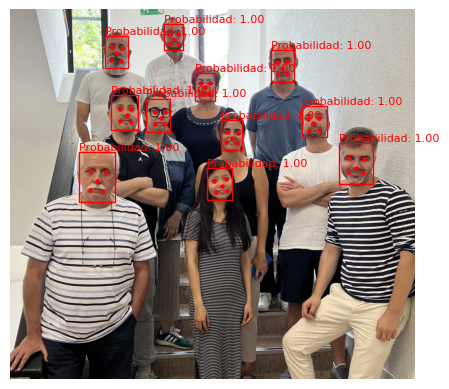

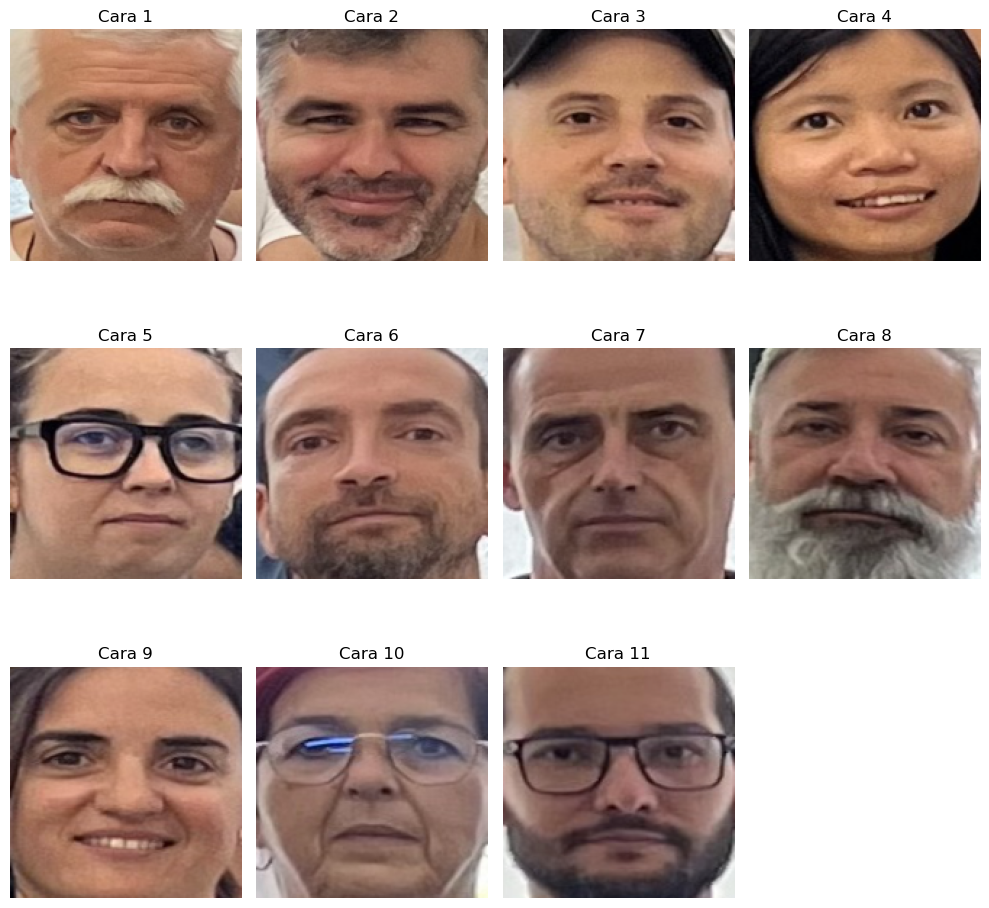

In [78]:
###############
# SECURE CODE #
###############

def mtcnn_face_detector(img):
    mtcnn = MTCNN(
        keep_all=True, # Utilizamos keep_all=True para obtener todas las caras detectadas
        min_face_size = 20,
        # threshold     = [0.6, 0.7, 0.7],
        post_process  = False,
        image_size    = 160,
        # device        = device
    )  
    img = Image.open(img)
    boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)

    return img, boxes, probs, landmarks

def extract_faces(image_path):
    mtcnn = MTCNN(keep_all=True)  # Utilizamos keep_all=True para obtener todas las caras detectadas
    img = Image.open(image_path)
    face_tensors = mtcnn(img)  # Usamos la función mtcnn directamente para obtener las caras extraídas

    return face_tensors

def get_embeddings(face_tensors):
    # Cargar el modelo InceptionResnetV1 preentrenado con 'vggface2'
    resnet = InceptionResnetV1(pretrained='vggface2').eval()

    # Preprocesar los tensores de las caras para adaptarlos al modelo
    preprocessed_faces = torch.stack([transforms.Resize((160, 160))(face) for face in face_tensors])

    # Obtener los embeddings utilizando el modelo InceptionResnetV1
    with torch.no_grad():
        embeddings = resnet(preprocessed_faces)

    return embeddings

ruta_img = os.path.join("C:/Users/72478072N/Documents/MF1", "./IMG_0862_new.jpg")

img_grupo, caras_detectadas, probabilidades, landmarks = mtcnn_face_detector(ruta_img)

plt.imshow(img_grupo)
plt.axis("off")

if caras_detectadas is not None:
    for box, probs, landmark in zip(caras_detectadas, probabilidades, landmarks):
        x, y, w, h = box
        rect = plt.Rectangle((x, y), w - x, h - y, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        
        # Mostrar la probabilidad de que la bounding box contenga una cara
        plt.text(x, y - 10, f"Probabilidad: {prob:.2f}", color='red', fontsize=8)

        # Mostrar las coordenadas de los ojos, nariz y comisura de la boca en cada cara detectada
        for (x, y) in landmark:
            plt.scatter(x, y, s=5, c='red')

# Tarea 6: Extracción de caras utilizando el método forward() y mostrarlas en pantalla
face_tensors = extract_faces(ruta_img)

# Calcular el número de filas y columnas para la cuadrícula de subfiguras
num_faces = len(face_tensors)
rows = int(num_faces ** 0.5)
cols = (num_faces + rows - 1) // rows

# Crear la cuadrícula de subfiguras y mostrar las caras extraídas
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < num_faces:
        face_tensor = face_tensors[i]
        face_img = face_tensor.permute(1, 2, 0).numpy()  # Convertir el tensor a una imagen numpy
        face_img = (face_img - face_img.min()) / (face_img.max() - face_img.min())  # Escalar los valores de los píxeles al rango [0, 1]
        ax.imshow(face_img)
        ax.axis('off')
        ax.set_title(f"Cara {i+1}")

# Eliminar subfiguras vacías si hay menos caras que subfiguras
for i in range(num_faces, rows * cols):
    fig.delaxes(axes.flatten()[i])

# Tarea 8: Obtener los encodings de todas las caras de la imagen
embeddings = get_embeddings(face_tensors)

# Calcular las distancias entre embeddigns de tres caras de tres personas de clase
if num_faces >= 3:
    # Indices de las caras seleccionadas (por ejemplo, las primeras tres)
    idx_1, idx_2, idx_3 = 0, 1, 2
    
    embedding_1, embedding_2, embedding_3 = embeddings[idx_1], embeddings[idx_2], embeddigns[idx_3]

    # Calcular las distancias euclidianas entre los embeddings selccionados
    distance_1_2 = euclidean(embedding_1.numpy(), embedding_2.numpy())
    distance_1_3 = euclidean(embedding_1.numpy(), embedding_3.numpy())
    distance_2_3 = euclidean(embedding_2.numpy(), embedding_3.numpy())
    
    print(f"Distancia entre cara 1 y cara 2: {distance_1_2:.4f}")
    print(f"Distancia entre cara 1 y cara 3: {distance_1_3:.4f}")
    print(f"Distancia entre cara 2 y cara 3: {distance_2_3:.4f}")
    

# Imprimir todos los embeddings
torch.set_printoptions(threshold=10000)
print("Encodings de las caras:")
print(embeddings)

plt.tight_layout()
plt.show()

Distancia entre cara 1 y cara 2: 1.1801
Distancia entre cara 1 y cara 3: 1.3366
Distancia entre cara 2 y cara 3: 1.5122
Encodings de las caras:
tensor([[ 1.2209e-02,  2.4464e-02,  1.9858e-03,  6.0858e-02, -3.1520e-02,
          2.0316e-02, -7.5789e-02,  2.8722e-02, -6.2701e-03,  5.5390e-02,
          4.6224e-02,  1.4666e-02,  3.4831e-02, -4.1205e-02, -3.9899e-03,
         -3.5726e-02, -7.9396e-02, -4.0273e-02,  1.6743e-02,  9.7582e-03,
         -2.4526e-02, -1.5870e-02, -6.7942e-02, -1.6154e-02,  2.5852e-03,
          2.7982e-02, -1.7874e-02,  2.5922e-02, -3.7368e-02,  1.7631e-03,
         -3.7941e-02, -1.3012e-02, -6.0064e-02,  9.4464e-03, -8.2295e-02,
         -9.2205e-03,  5.0030e-02, -2.0246e-02,  6.0351e-03,  5.0326e-03,
         -2.0704e-02,  1.3286e-01,  3.6439e-02,  3.4260e-02,  4.7032e-02,
          7.1929e-02,  1.7833e-02, -1.8966e-02,  1.2092e-02, -6.0792e-02,
          2.0034e-02, -5.4450e-02, -1.3737e-02,  2.7666e-02,  2.5928e-03,
          2.0344e-02,  7.0561e-03, -3.5242

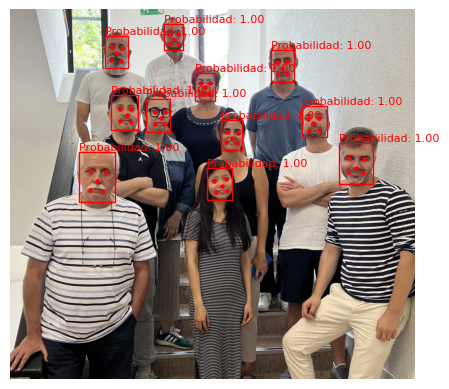

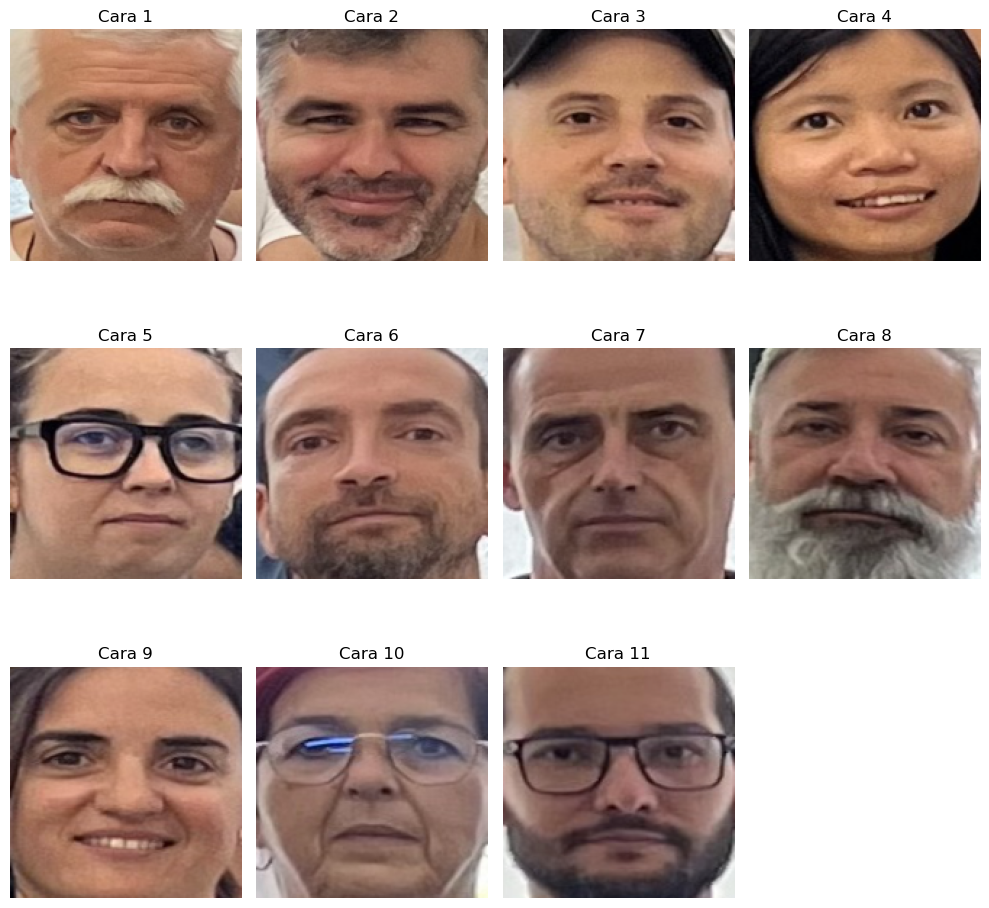

In [81]:
#Programa de reconocimiento facial

def mtcnn_face_detector(img):
    mtcnn = MTCNN(
        keep_all=True, # Utilizamos keep_all=True para obtener todas las caras detectadas
        min_face_size = 20,
        # threshold     = [0.6, 0.7, 0.7],
        post_process  = False,
        image_size    = 160,
        # device        = device
    )  
    img = Image.open(img)
    boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)

    return img, boxes, probs, landmarks

def extract_faces(image_path):
    mtcnn = MTCNN(keep_all=True)  # Utilizamos keep_all=True para obtener todas las caras detectadas
    img = Image.open(image_path)
    face_tensors = mtcnn(img)  # Usamos la función mtcnn directamente para obtener las caras extraídas

    return face_tensors

def get_embeddings(face_tensors):
    # Cargar el modelo InceptionResnetV1 preentrenado con 'vggface2'
    resnet = InceptionResnetV1(pretrained='vggface2').eval()

    # Preprocesar los tensores de las caras para adaptarlos al modelo
    preprocessed_faces = torch.stack([transforms.Resize((160, 160))(face) for face in face_tensors])

    # Obtener los embeddings utilizando el modelo InceptionResnetV1
    with torch.no_grad():
        embeddings = resnet(preprocessed_faces)

    return embeddings

ruta_img = os.path.join("C:/Users/72478072N/Documents/MF1", "./IMG_0862_new.jpg")

img_grupo, caras_detectadas, probabilidades, landmarks = mtcnn_face_detector(ruta_img)

plt.imshow(img_grupo)
plt.axis("off")

if caras_detectadas is not None:
    for box, probs, landmark in zip(caras_detectadas, probabilidades, landmarks):
        x, y, w, h = box
        rect = plt.Rectangle((x, y), w - x, h - y, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        
        # Mostrar la probabilidad de que la bounding box contenga una cara
        plt.text(x, y - 10, f"Probabilidad: {prob:.2f}", color='red', fontsize=8)

        # Mostrar las coordenadas de los ojos, nariz y comisura de la boca en cada cara detectada
        for (x, y) in landmark:
            plt.scatter(x, y, s=5, c='red')

# Tarea 6: Extracción de caras utilizando el método forward() y mostrarlas en pantalla
face_tensors = extract_faces(ruta_img)

# Calcular el número de filas y columnas para la cuadrícula de subfiguras
num_faces = len(face_tensors)
rows = int(num_faces ** 0.5)
cols = (num_faces + rows - 1) // rows

# Crear la cuadrícula de subfiguras y mostrar las caras extraídas
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < num_faces:
        face_tensor = face_tensors[i]
        face_img = face_tensor.permute(1, 2, 0).numpy()  # Convertir el tensor a una imagen numpy
        face_img = (face_img - face_img.min()) / (face_img.max() - face_img.min())  # Escalar los valores de los píxeles al rango [0, 1]
        ax.imshow(face_img)
        ax.axis('off')
        ax.set_title(f"Cara {i+1}")

# Eliminar subfiguras vacías si hay menos caras que subfiguras
for i in range(num_faces, rows * cols):
    fig.delaxes(axes.flatten()[i])

# Tarea 8: Obtener los encodings de todas las caras de la imagen
embeddings = get_embeddings(face_tensors)

# Calcular las distancias entre embeddigns de tres caras de tres personas de clase
if num_faces >= 3:
    # Indices de las caras seleccionadas (por ejemplo, las primeras tres)
    idx_1, idx_2, idx_3 = 0, 1, 2
    
    embedding_1, embedding_2, embedding_3 = embeddings[idx_1], embeddings[idx_2], embeddigns[idx_3]

    # Calcular las distancias euclidianas entre los embeddings selccionados
    distance_1_2 = euclidean(embedding_1.numpy(), embedding_2.numpy())
    distance_1_3 = euclidean(embedding_1.numpy(), embedding_3.numpy())
    distance_2_3 = euclidean(embedding_2.numpy(), embedding_3.numpy())
    
    print(f"Distancia entre cara 1 y cara 2: {distance_1_2:.4f}")
    print(f"Distancia entre cara 1 y cara 3: {distance_1_3:.4f}")
    print(f"Distancia entre cara 2 y cara 3: {distance_2_3:.4f}")
    

# Imprimir todos los embeddings
torch.set_printoptions(threshold=10000)
print("Encodings de las caras:")
print(embeddings)

plt.tight_layout()
plt.show()